In [3]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [33]:
p <- file.path(getwd(),"gplus/")
print(p)

[1] "E:/2018 Spring/232/project2/gplus"


In [34]:
all_files <- list.files(path = p, pattern = ".circles")

In [36]:
count <- 0
for(i in 1:length(all_files)){
    if (file.size(paste0('gplus/',all_files[i])) == 0) next
    f <- read.table(paste0('gplus/',all_files[i]), sep=" ")
    if(nrow(f) > 2){
        count <- count + 1
    }
}
print(length(all_files))
print(count)

[1] 132
[1] 132
[1] 57


In [2]:
file_name <- c("109327480479767108490","115625564993990145546","101373961279443806744")

[1] 1


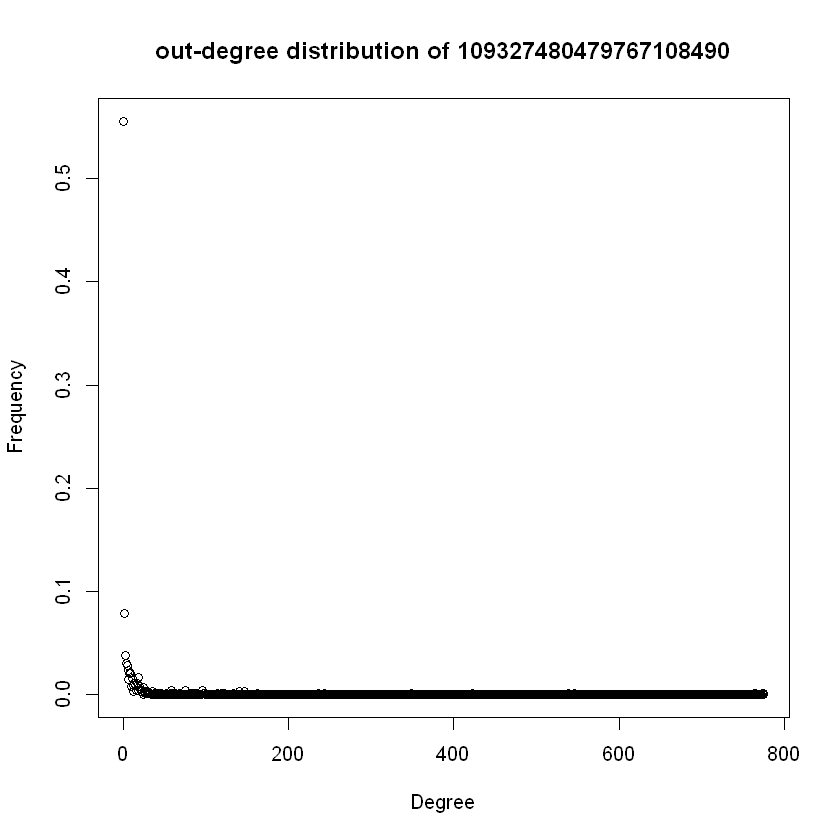

[1] 2


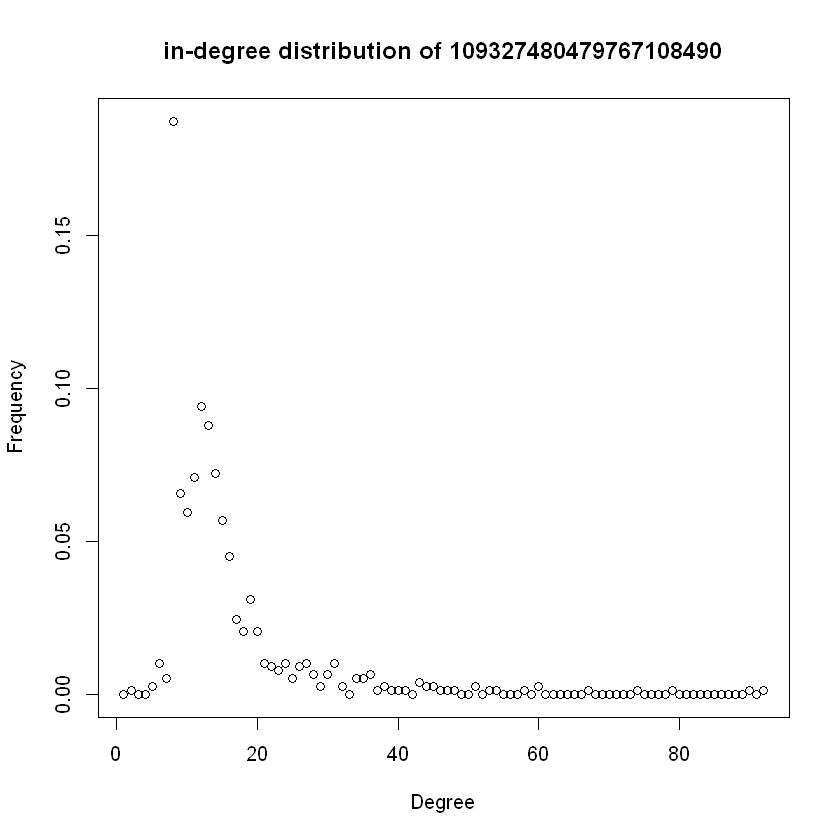

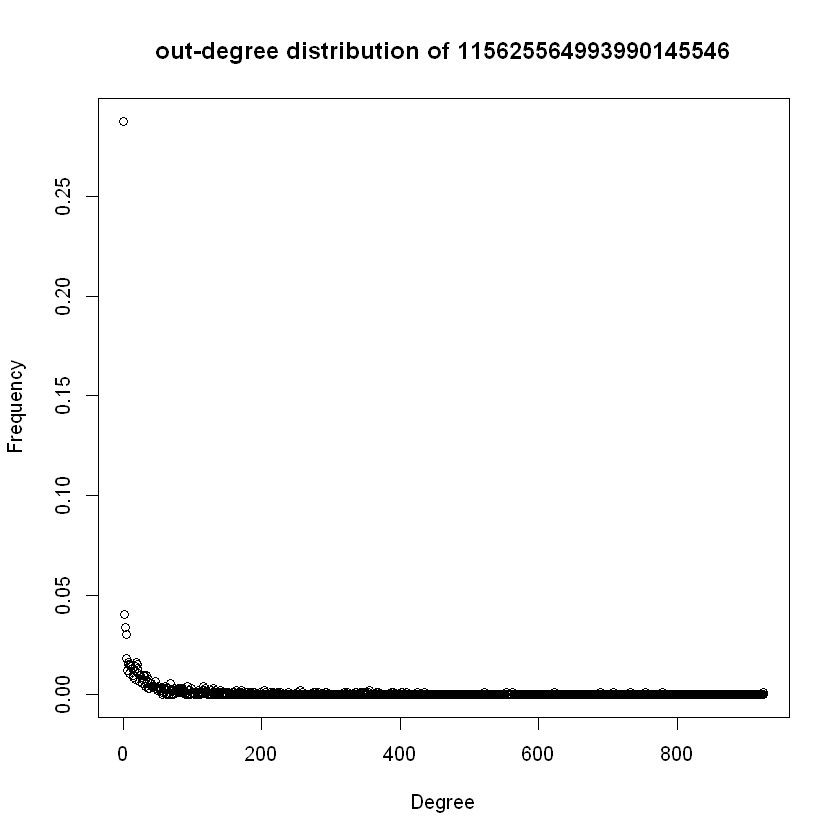

[1] 3


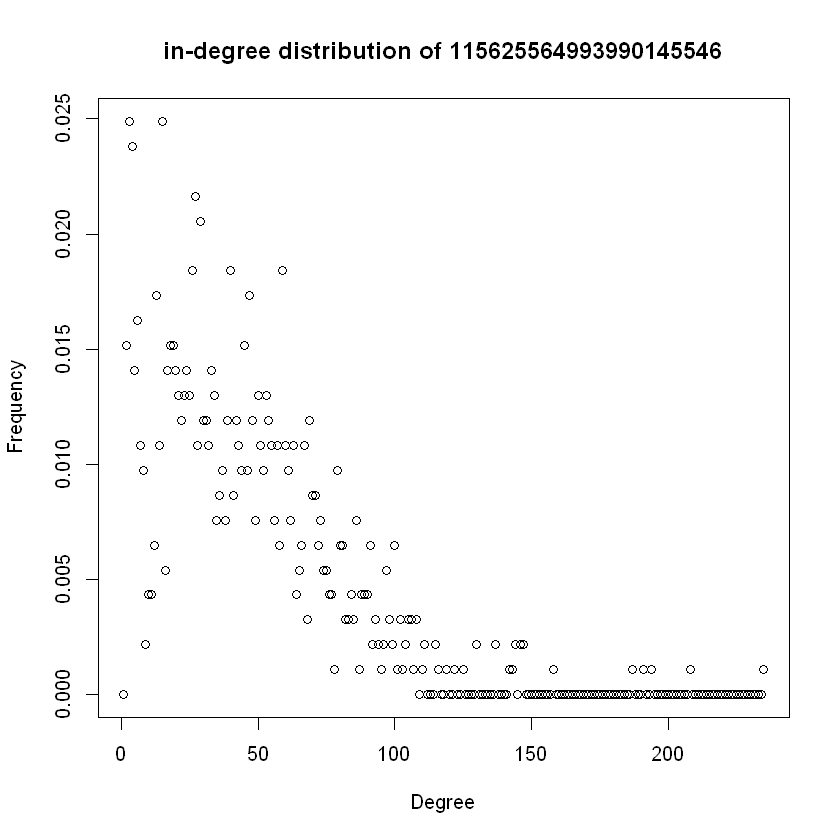

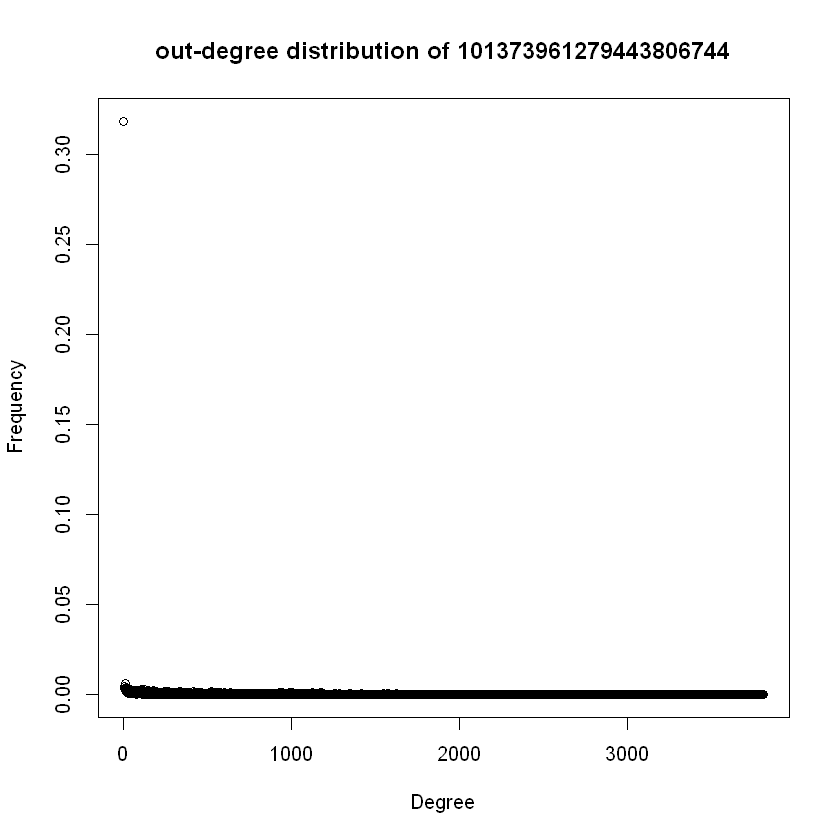

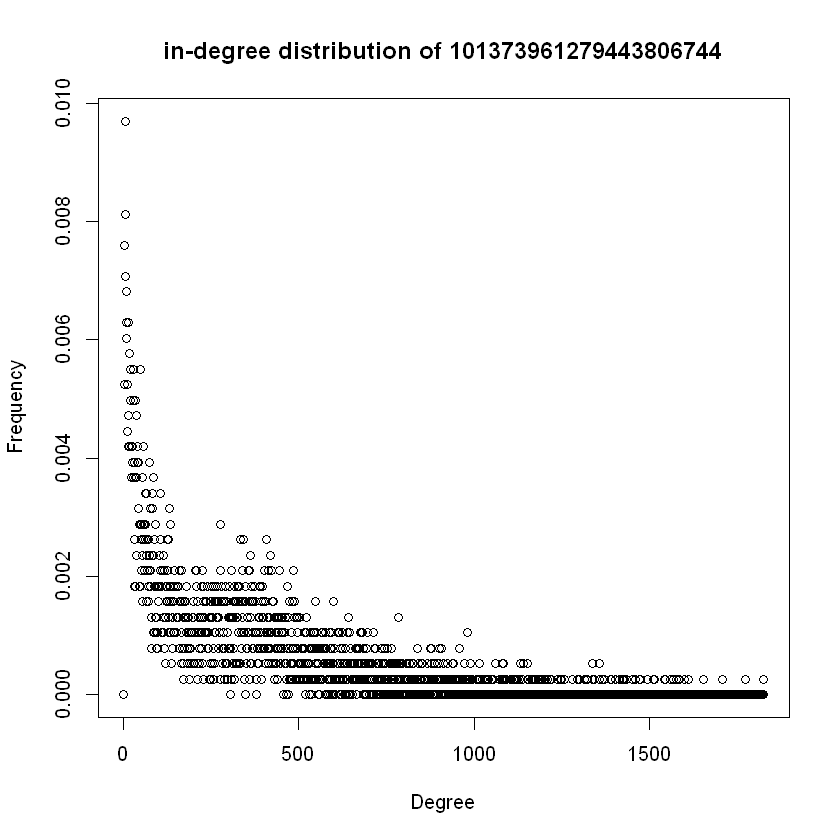

In [4]:
for(i in 1:length(file_name)){
    print(i)
    options(scipen = 999)
    f <- read.table(paste0('gplus/',file_name[i],".edges"), sep = " ")
    g <- graph.data.frame(f, directed=TRUE)
    g <- add_vertices(g, 1, name = file_name[i], color="red")
    vlist <- vertex_attr(g, "name")
    for(j in 1:length(vlist))
        g <- add_edges(g, c(file_name[i], vlist[j]))
    plot(degree.distribution(g,mode="out"),main=paste("out-degree distribution of",file_name[i]),xlab="Degree",ylab="Frequency")
    plot(degree.distribution(g,mode="in"),main=paste("in-degree distribution of",file_name[i]),xlab="Degree",ylab="Frequency")
}

[1] 0.2527871


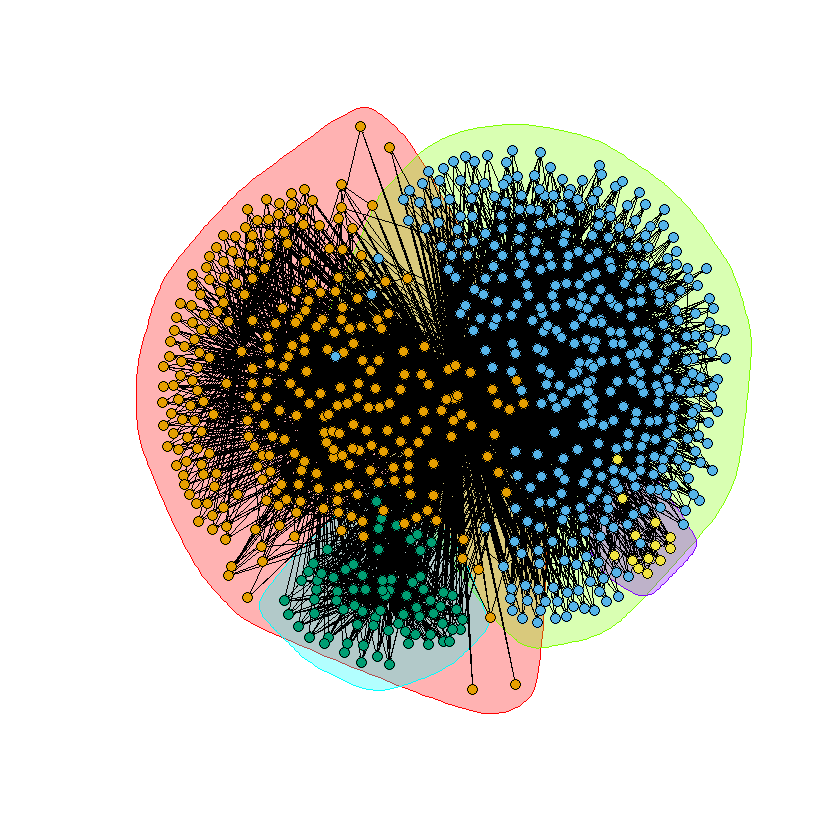

In [30]:
for(i in 1:1){
    options(scipen = 999)
    f <- read.table(paste0('gplus/',file_name[i],".edges"), sep = " ")
    g <- graph.data.frame(f, directed=TRUE)
    g <- add_vertices(g, 1, name = file_name[i], color="red")
    vlist <- vertex_attr(g, "name")
    for(j in 1:length(vlist))
        g <- add_edges(g, c(file_name[i], vlist[j]))
    fg1 =  walktrap.community(g)
    layout1 = layout.fruchterman.reingold(g)
    plot(fg1, g, layout=layout1, vertex.size=4, vertex.label=NA, edge.color="black", edge.arrow.size=0.02, edge.width=0.05)
    print(modularity(g, membership(fg1)))
}


In [31]:
library(igraph)
file_name <- c("109327480479767108490","115625564993990145546","101373961279443806744")
for(i in 1:1){
    options(scipen = 999)
    f <- read.table(paste0('gplus/',file_name[i],".edges"), sep = " ")
    g <- graph.data.frame(f, directed=TRUE)
    g <- add_vertices(g, 1, name = file_name[i])
    vlist <- vertex_attr(g, "name")
    for(j in 1:length(vlist))
        g <- add_edges(g, c(file_name[i], vlist[j]))
    cm =  walktrap.community(g)

    print(length(cm))
    print(length(cm[[4]]))
     
    #Q22    
    f <- read.table(paste0('gplus/',file_name[i],".circles"), sep = "\t", fill=TRUE)
    circles <- f[-c(1)]
    N = unique(c(unlist(circles), file_name[i]))
    print(length(N))

    HC <- 0
    HK <- 0
    HCK <- 0
    HKC <- 0
    for(j in 1:nrow(circles)){
        HC <- HC + (length(circles[j,])/length(N)) * log(length(circles[j,])/length(N))
    }
    for(j in 1:length(cm)){
        HK <- HK + (length(cm[[j]] %in% N)/length(N)) * log((length(cm[[j]] %in% N)/length(N)))
    }
    HC <- HC*-1
    HK <- HK*-1

    for(j in 1:nrow(circles)){
        a <- length(circles[j,])
        for(k in 1:length(cm)){
            b <- length(cm[[j]] %in% N)
            C <- length(intersect(circles[j,],cm[[k]]))
            if(C>0){
                HCK <- HCK + (C/length(N)) * log(C/b)
                HKC <- HKC + (C/length(N)) * log(C/a)
            }
        }
    }
    HCK <- HCK*-1
    HKC <- HKC*-1
    h <- 1 - HCK/HC
    c <- 1 - HKC/HK
    print(h)
    print(c)
}

[1] 13
[1] 4
[1] 766
[1] 1.261085
[1] 0.144656
